In [1]:
import glob
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

directory = '~/Desktop/pysentimiento/notebooks/fairness/'

In [19]:
calculo_treatment_eq(10,1,False)

10.0

In [20]:
import pandas as pd
import numpy as np


# Funciones que utilizaré:
def create_sum_cm_for_label(cm, sel_label, sel_class=None):

    labels = np.array(["anger", "fear", "joy", "sadness", "neutral"])

    n = np.where(labels==sel_label)[0][0]

    tp = cm[n,n]

    fn = np.sum(cm[n,:])-tp
    fp = np.sum(cm[:,n])-tp

    tn = np.sum(cm)-fn-fp-tp

    #d = {'label': sel_label, 'tp':tp,'tn':tn,'fp':fp,'fn':fn,'class': sel_class}
    d = {'label': [sel_label], 'tp':[tp],'tn': [tn],'fp': [fp],'fn': [fn],'class': [sel_class]}

    return d

def calculo_treatment_eq(fn,fp, withot_zeros):
    if withot_zeros:
        fn_or = fn
        fp_or = fp
        fn = [fn_or+1 if fn_or==0 or fp_or==0 else fn_or][0]
        fp = [fp_or+1 if fn_or==0 or fp_or==0 else fp_or][0] 
    return fn/fp

def calculo_tpr(tp,fn):
    return tp/(tp+fn)

def calculo_fnr(fn, tp):
    return fn/(tp+fn)

def calculo_ppv(tp, fp):
    return tp/(tp+fp)

def calculo_npv(tn, fn):
    return tn/(tn+fn)

def calculo_fpr(fp, tn):
    return fp/(fp+tn)

def calculo_acc(tp, fp, fn, tn):
    return (tp+tn)/(tp+tn+fp+fn)


def calculo_metricas_fairness(tp, fp, fn, tn, return_as_list = True):
    if return_as_list:
        out = {'treatment_eq': [calculo_treatment_eq(fn,fp, False)], 'treatment_eq_without_zeros': [calculo_treatment_eq(fn,fp, True)], 'tpr':[calculo_tpr(tp,fn)], 'fnr':[calculo_fnr(fn, tp)], 'ppv': [calculo_ppv(tp, fp)], 'npv': [calculo_npv(tn, fn)],
               'fpr': [calculo_fpr(fp, tn)], 'accuracy': [calculo_acc(tp, fp, fn, tn)],
               'tp':[tp], 'fp':[fp], 'fn':[fn], 'tn':[tn],}
    else:
        out = {'treatment_eq': calculo_treatment_eq(fn,fp, False),'treatment_eq_without_zeros': calculo_treatment_eq(fn,fp,True), 'tpr':calculo_tpr(tp,fn), 'fnr':calculo_fnr(fn, tp), 'ppv': calculo_ppv(tp, fp), 'npv': calculo_npv(tn, fn), 'fpr': calculo_fpr(fp, tn),
               'accuracy': calculo_acc(tp, fp, fn, tn),
               'tp':tp, 'fp':fp, 'fn':fn, 'tn':tn,}
    return out


def calculo_eq_opp(tpr1, tpr2):
    return tpr1-tpr2, tpr1/tpr2

def calculo_eq_odds(tpr1, tpr2, fpr1, fpr2):
    tpr_dif_abs = np.abs(tpr1-tpr2)
    fpr_dif_abs = np.abs(fpr1-fpr2)
    eq_odds_dif = np.max([tpr_dif_abs, fpr_dif_abs])
    
    tpr_ratio = tpr1/tpr2
    fpr_ratio = fpr1/fpr2
    eq_odds_ratio = np.max([tpr_ratio, fpr_ratio])
    
    return eq_odds_dif, eq_odds_ratio


def calculo_conditional_use_accuracy_equity(ppv1, ppv2, npv1, npv2):
    ppv_dif_abs = np.abs(ppv1-ppv2)
    npv_dif_abs = np.abs(npv1-npv2)
    conditional_use_accuracy_equity_dif = np.max([ppv_dif_abs, npv_dif_abs])
    
    ppv_ratio = ppv1/ppv2
    npv_ratio = npv1/npv2
    conditional_use_accuracy_equity_ratio = np.max([ppv_ratio, npv_ratio])
    
    return conditional_use_accuracy_equity_dif, conditional_use_accuracy_equity_ratio

def calculo_disparate_impact(tp1,fp1,tn1,fn1, tp2,fp2,tn2,fn2):
    stat_parity_1 = (tp1+fp1)/(tp1+fp1+tn1+fn1)
    stat_parity_2 = (tp2+fp2)/(tp2+fp2+tn2+fn2)
    
    return stat_parity_1/stat_parity_2

def calculo_treatment_eq_dif(treatment_eq1, treatment_eq2):
    treatment_eq_dif = treatment_eq1 - treatment_eq2
    #treatment_eq_ratio = treatment_eq1 / treatment_eq2
    return np.abs(treatment_eq_dif)#, treatment_eq_ratio

def calculo_treatment_eq_ratio(treatment_eq1, treatment_eq2):
    #treatment_eq_dif = treatment_eq1 - treatment_eq2
    treatment_eq_ratio = treatment_eq1 / treatment_eq2
    return treatment_eq_ratio



In [21]:
models_results_csvs = glob.glob('*evaluation.csv')
len(models_results_csvs)

5

# Race analysis per model

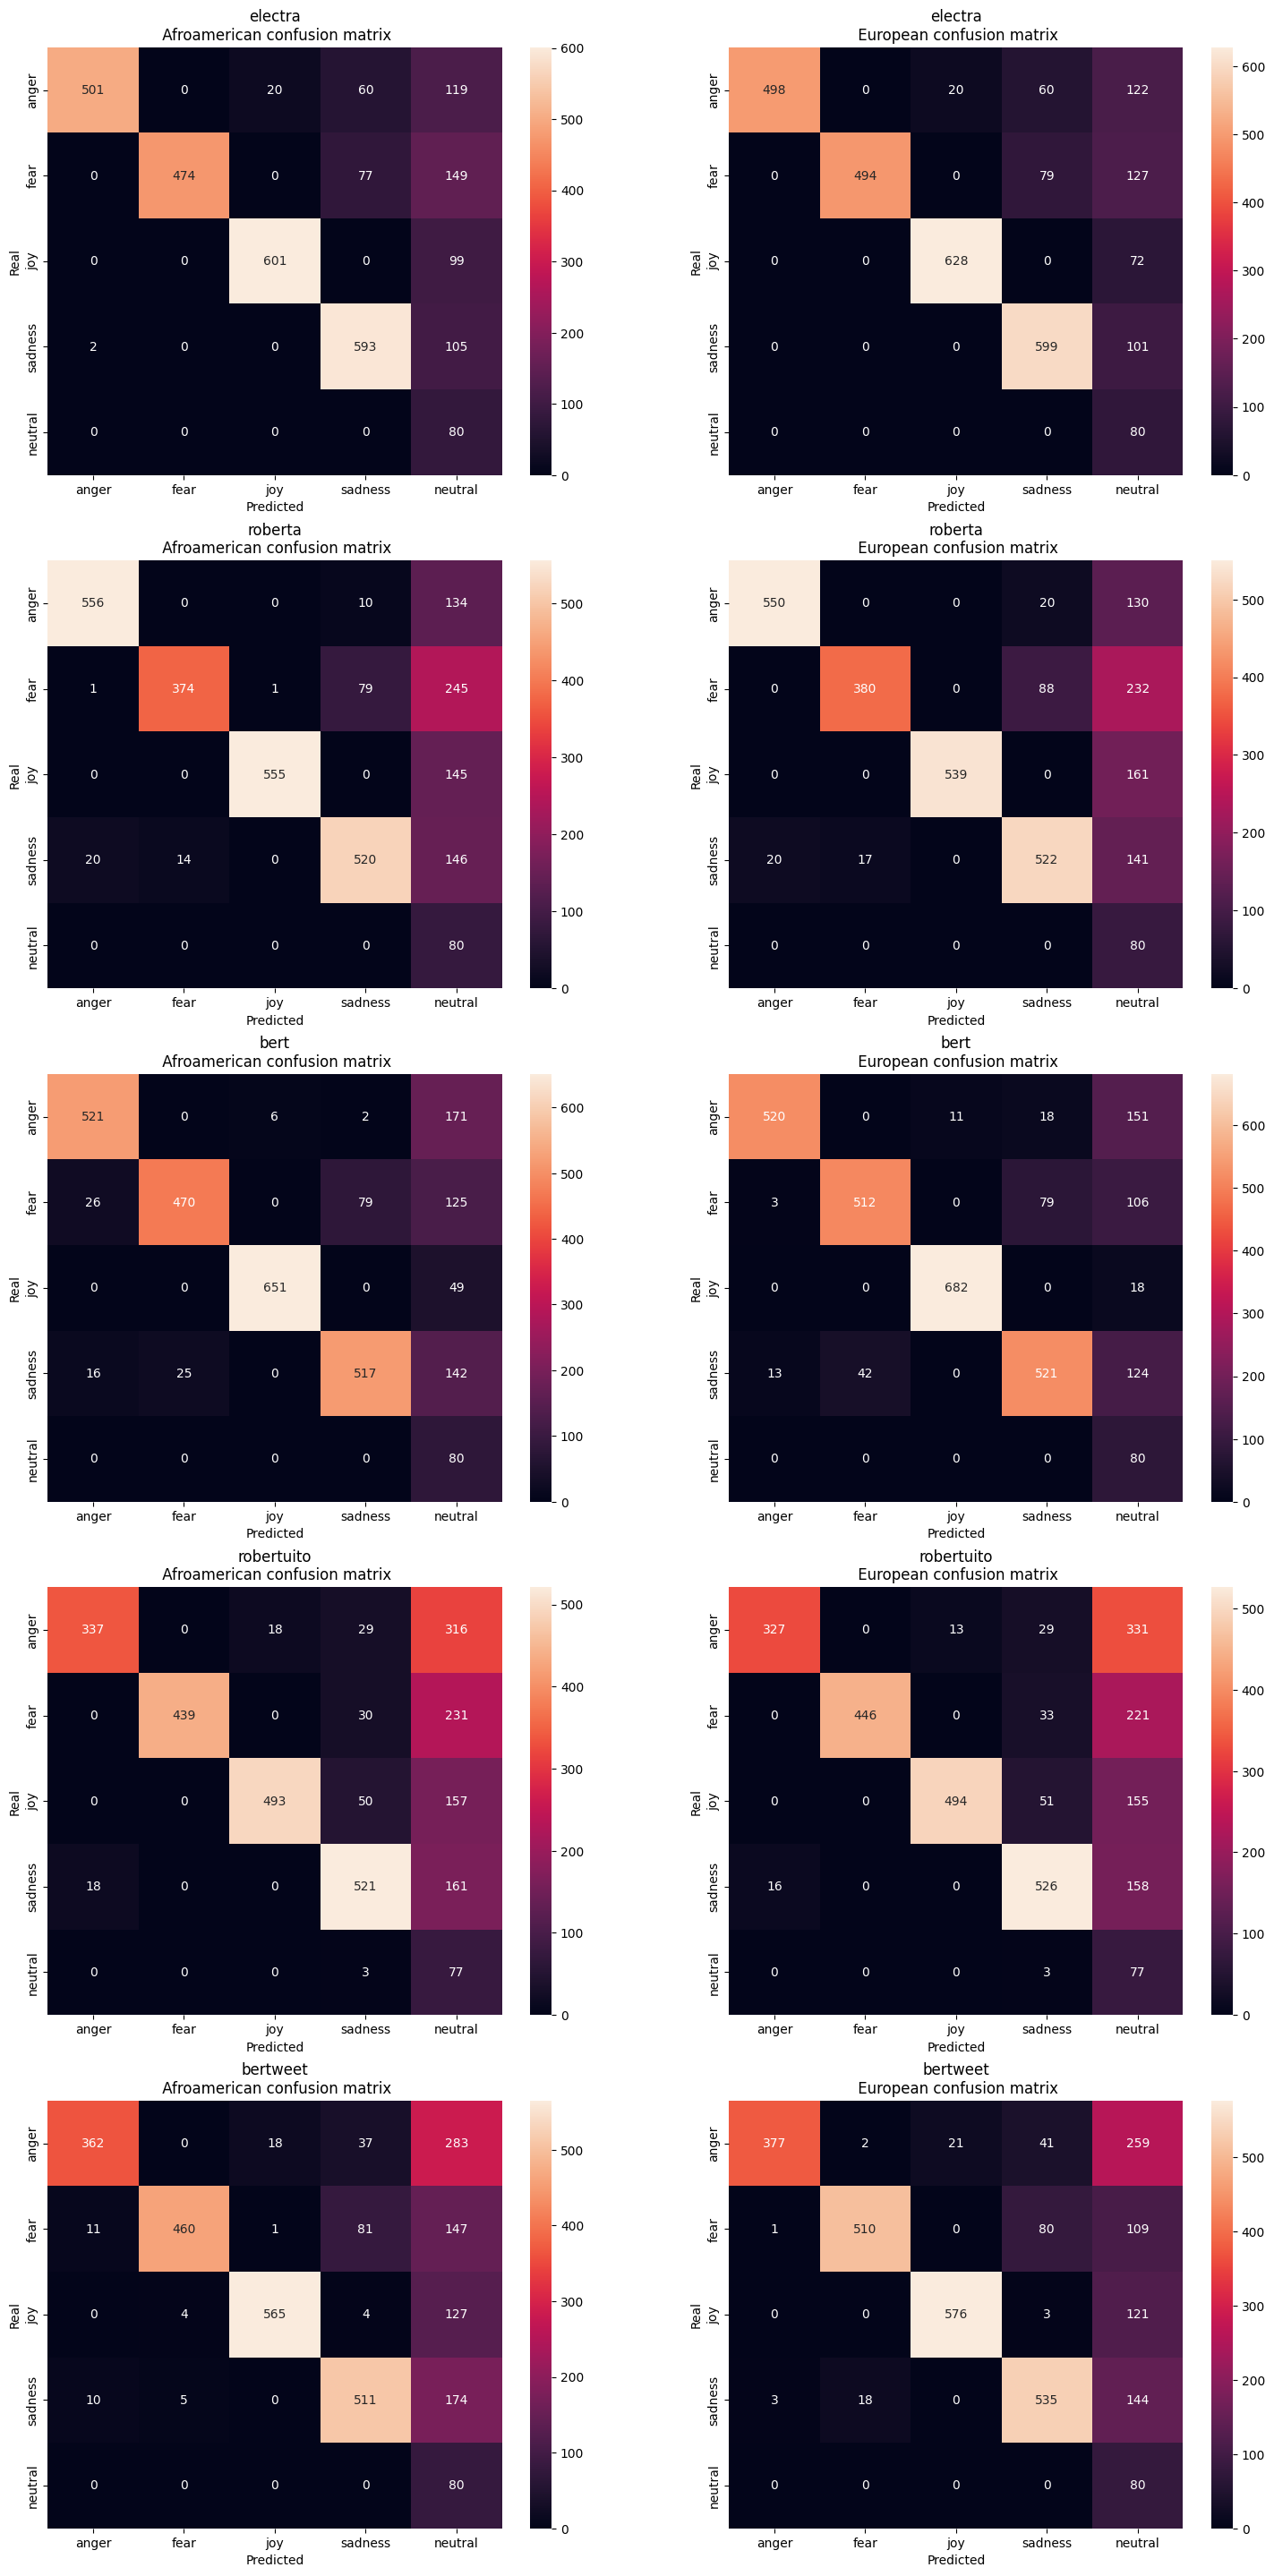

In [22]:
plt.rcParams["figure.figsize"] = (18,36)

i = 1

for model in models_results_csvs:

    df = pd.read_csv(directory+ model)

    afroamerican = df[df["race"] == "African-American"]
    european = df[df["race"] == "European"]

    cm_afroamerican = confusion_matrix(
        afroamerican["emotion"], afroamerican["ekman_pred"],
        labels=["anger", "fear", "joy", "sadness", "neutral"])

    cm_european = confusion_matrix(
        european["emotion"], european["ekman_pred"],
        labels=["anger", "fear", "joy", "sadness", "neutral"])
    #plt.clf()
    plt.subplot(5, 2, i)
    sns.heatmap(cm_afroamerican, annot=True, fmt="d", xticklabels=["anger", "fear", "joy", "sadness", "neutral"], yticklabels=["anger", "fear", "joy", "sadness", "neutral"])
    # Add "Real"

    plt.ylabel("Real")
    plt.xlabel("Predicted")

    plt.title(model[:-22] + "\n Afroamerican confusion matrix")
    #plt.plot()
    
    i=i+1
    plt.subplot(5, 2, i)
    sns.heatmap(cm_european, annot=True, fmt="d", xticklabels=["anger", "fear", "joy", "sadness", "neutral"], yticklabels=["anger", "fear", "joy", "sadness", "neutral"])
    # Add "Real"

    plt.ylabel("Real")
    plt.xlabel("Predicted")

    plt.title(model[:-22] + "\n European confusion matrix")

    i=i+1
    
plt.savefig('cm_race_analysis_per_model.jpg', dpi=300)

## Analisis de sesgos con métricas:

In [28]:
df_fairness_analysis_per_models = pd.DataFrame()

for model in models_results_csvs:

    df = pd.read_csv(directory+ model)

    afroamerican = df[df["race"] == "African-American"]
    european = df[df["race"] == "European"]

    cm_afroamerican = confusion_matrix(
        afroamerican["emotion"], afroamerican["ekman_pred"],
        labels=["anger", "fear", "joy", "sadness", "neutral"])

    cm_european = confusion_matrix(
        european["emotion"], european["ekman_pred"],
        labels=["anger", "fear", "joy", "sadness", "neutral"])
    
    df_aux = pd.DataFrame()
    for cm, sel_class in zip([cm_afroamerican, cm_european],['afroamerican', 'european']):
        for sel_label in ["anger", "fear", "joy", "sadness", "neutral"]:
            df_aux = pd.concat([df_aux, pd.DataFrame.from_dict(create_sum_cm_for_label(cm, sel_label, sel_class))])

    df_race_summary = df_aux.sort_values('label')
    #df_race_summary['model'] = model[:-22]
    #print(df_race_summary.head())
    
    df_aux = pd.DataFrame()
    for sel_race in ['european', 'afroamerican']:
        for sel_sentimient in df_race_summary.label.unique():
            
            df_sel_race_sel_sentimient = df_race_summary[(df_race_summary['class']==sel_race)&(df_race_summary['label']==sel_sentimient)]
            metricas_fairness_sel_race_sel_sentimient = calculo_metricas_fairness(df_sel_race_sel_sentimient.tp.values[0], df_sel_race_sel_sentimient.fp.values[0], 
                                                                        df_sel_race_sel_sentimient.fn.values[0], df_sel_race_sel_sentimient.tn.values[0])
            metricas_fairness_sel_race_sel_sentimient['race'] = sel_race
            metricas_fairness_sel_race_sel_sentimient['sentimient'] = sel_sentimient
            metricas_fairness_sel_race_sel_sentimient['model'] = model[:-22]

            df_aux = pd.concat([df_aux, pd.DataFrame.from_dict(metricas_fairness_sel_race_sel_sentimient)])

    df = df_aux.sort_values('sentimient')
    #df = df[['race', 'sentimient', 'tp','fp', 'fn', 'tn', 'accuracy', 'tpr', 'fnr', 'ppv', 'npv', 'fpr',]]
    #df.round(3).to_csv('race_metrics_preliminars.csv')
    
    df_fairness_analysis_per_models =  pd.concat([df_fairness_analysis_per_models, df])
df_fairness_analysis_per_models.to_csv('basic_measures_per_model_race_analysis.csv')

/tmp/ipykernel_23170/393372718.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  return fn/fp
/tmp/ipykernel_23170/393372718.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  return fn/fp
/tmp/ipykernel_23170/393372718.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  return fn/fp
/tmp/ipykernel_23170/393372718.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  return fn/fp
/tmp/ipykernel_23170/393372718.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  return fn/fp


In [29]:
df_fairness_analysis_per_models.head()

,treatment_eq,treatment_eq_without_zeros,tpr,fnr,ppv,npv,fpr,accuracy,tp,fp,fn,tn,race,sentimient,model
0,inf,203.0,0.711429,0.288571,1.000000,0.915197,0.000000,0.929861,498,0,202,2180,european,anger,electra
0,99.5,99.5,0.715714,0.284286,0.996024,0.916281,0.000917,0.930208,501,2,199,2178,afroamerican,anger,electra
0,inf,207.0,0.705714,0.294286,1.000000,0.913663,0.000000,0.928472,494,0,206,2180,european,fear,electra
0,inf,227.0,0.677143,0.322857,1.000000,0.906068,0.000000,0.921528,474,0,226,2180,afroamerican,fear,electra
0,3.6,3.6,0.897143,0.102857,0.969136,0.967742,0.009174,0.968056,628,20,72,2160,european,joy,electra


In [30]:
df_aux = pd.DataFrame()
for cm, sel_class in zip([cm_afroamerican, cm_european],['afroamerican', 'european']):
    for sel_label in ["anger", "fear", "joy", "sadness", "neutral"]:
        df_aux = pd.concat([df_aux, pd.DataFrame.from_dict(create_sum_cm_for_label(cm, sel_label, sel_class))])

df_race_summary = df_aux.sort_values('label')
df_race_summary


df_aux = pd.DataFrame()
for sel_race in ['european', 'afroamerican']:
    for sel_sentimient in df_race_summary.label.unique():
        
        df_sel_race_sel_sentimient = df_race_summary[(df_race_summary['class']==sel_race)&(df_race_summary['label']==sel_sentimient)]
        metricas_fairness_sel_race_sel_sentimient = calculo_metricas_fairness(df_sel_race_sel_sentimient.tp.values[0], df_sel_race_sel_sentimient.fp.values[0], 
                                                                    df_sel_race_sel_sentimient.fn.values[0], df_sel_race_sel_sentimient.tn.values[0])
        metricas_fairness_sel_race_sel_sentimient['race'] = sel_race
        metricas_fairness_sel_race_sel_sentimient['sentimient'] = sel_sentimient

        df_aux = pd.concat([df_aux, pd.DataFrame.from_dict(metricas_fairness_sel_race_sel_sentimient)])

df = df_aux.sort_values('sentimient')
#df = df[['race', 'sentimient', 'tp','fp', 'fn', 'tn', 'accuracy', 'tpr', 'fnr', 'ppv', 'npv', 'fpr',]]
#df.round(3).to_csv('race_metrics_preliminars.csv')
df




,treatment_eq,treatment_eq_without_zeros,tpr,fnr,ppv,npv,fpr,accuracy,tp,fp,fn,tn,race,sentimient
0,80.750000,80.750000,0.538571,0.461429,0.989501,0.870748,0.001835,0.886458,377,4,323,2176,european,anger
0,16.095238,16.095238,0.517143,0.482857,0.945170,0.864638,0.009633,0.875347,362,21,338,2159,afroamerican,anger
0,9.500000,9.500000,0.728571,0.271429,0.962264,0.919149,0.009174,0.927083,510,20,190,2160,european,fear
0,26.666667,26.666667,0.657143,0.342857,0.980810,0.900456,0.004128,0.913542,460,9,240,2171,afroamerican,fear
0,5.904762,5.904762,0.822857,0.177143,0.964824,0.945686,0.009633,0.949653,576,21,124,2159,european,joy
0,7.105263,7.105263,0.807143,0.192857,0.967466,0.941202,0.008716,0.946528,565,19,135,2161,afroamerican,joy
0,0.000000,0.001577,1.000000,0.000000,0.112202,1.000000,0.226071,0.780208,80,633,0,2167,european,neutral
0,0.000000,0.001366,1.000000,0.000000,0.098644,1.000000,0.261071,0.746181,80,731,0,2069,afroamerican,neutral
0,1.330645,1.330645,0.764286,0.235714,0.811836,0.925709,0.056881,0.899653,535,124,165,2056,european,sadness
0,1.549180,1.549180,0.730000,0.270000,0.807267,0.915888,0.055963,0.892014,511,122,189,2058,afroamerican,sadness


In [44]:
df_fairness_analysis_per_models = pd.DataFrame()

for model in models_results_csvs:

    df = pd.read_csv(directory+ model)

    afroamerican = df[df["race"] == "African-American"]
    european = df[df["race"] == "European"]

    cm_afroamerican = confusion_matrix(
        afroamerican["emotion"], afroamerican["ekman_pred"],
        labels=["anger", "fear", "joy", "sadness", "neutral"])

    cm_european = confusion_matrix(
        european["emotion"], european["ekman_pred"],
        labels=["anger", "fear", "joy", "sadness", "neutral"])
    
    df_aux = pd.DataFrame()
    for cm, sel_class in zip([cm_afroamerican, cm_european],['afroamerican', 'european']):
        for sel_label in ["anger", "fear", "joy", "sadness", "neutral"]:
            df_aux = pd.concat([df_aux, pd.DataFrame.from_dict(create_sum_cm_for_label(cm, sel_label, sel_class))])

    df_race_summary = df_aux.sort_values('label')
    #df_race_summary['model'] = model[:-22]
    #print(df_race_summary.head())
    
    df_aux = pd.DataFrame()
    for sel_race in ['european', 'afroamerican']:
        for sel_sentimient in df_race_summary.label.unique():
            
            df_sel_race_sel_sentimient = df_race_summary[(df_race_summary['class']==sel_race)&(df_race_summary['label']==sel_sentimient)]
            metricas_fairness_sel_race_sel_sentimient = calculo_metricas_fairness(df_sel_race_sel_sentimient.tp.values[0], df_sel_race_sel_sentimient.fp.values[0], 
                                                                        df_sel_race_sel_sentimient.fn.values[0], df_sel_race_sel_sentimient.tn.values[0])
            metricas_fairness_sel_race_sel_sentimient['race'] = sel_race
            metricas_fairness_sel_race_sel_sentimient['sentimient'] = sel_sentimient
            metricas_fairness_sel_race_sel_sentimient['model'] = model[:-22]

            df_aux = pd.concat([df_aux, pd.DataFrame.from_dict(metricas_fairness_sel_race_sel_sentimient)])

    df = df_aux.sort_values('sentimient')
    #df = df[['race', 'sentimient', 'tp','fp', 'fn', 'tn', 'accuracy', 'tpr', 'fnr', 'ppv', 'npv', 'fpr',]]
    #df.round(3).to_csv('race_metrics_preliminars.csv')
    
#    df_fairness_analysis_per_models =  pd.concat([df_fairness_analysis_per_models, df])

    df_concat = pd.DataFrame()

    for sel_sentimient in df.sentimient.unique():
        df_aux = df[df.sentimient == sel_sentimient]
        
        df_aux_metrics = pd.DataFrame()
        
        #print(calculo_treatment_eq_dif(df_aux.treatment_eq.values[0],df_aux.treatment_eq.values[1]))

        #df_aux_metrics[['treatment_eq_dif', 'treatment_eq_ratio']] =[calculo_treatment_eq(df_aux.treatment_eq.values[0],df_aux.treatment_eq.values[1])] 
        df_aux_metrics[['equal_odds_dif', 'equal_odds_ratio']] =[calculo_eq_opp(df_aux.tpr.values[0],df_aux.tpr.values[1])] 
        df_aux_metrics[['equal_op_dif', 'equal_op_ratio']] =[calculo_eq_opp(df_aux.tpr.values[0],df_aux.tpr.values[1])] 
        df_aux_metrics[['cond_acc_dif', 'cond_acc_ratio']] =[calculo_conditional_use_accuracy_equity(df_aux.ppv.values[0],df_aux.ppv.values[1],df_aux.npv.values[0],df_aux.npv.values[1],)] 
        df_aux_metrics['disp_impact'] = calculo_disparate_impact(df_aux.tp.values[0],df_aux.fp.values[0],df_aux.tn.values[0],df_aux.fn.values[0],df_aux.tp.values[1],df_aux.fp.values[1],df_aux.tn.values[1],df_aux.fn.values[1])
        df_aux_metrics['sentimient'] = sel_sentimient
        df_aux_metrics['treatment_eq_dif'] = calculo_treatment_eq_dif(df_aux.treatment_eq.values[0],df_aux.treatment_eq.values[1])
        df_aux_metrics['treatment_eq_without_zeros_dif'] = calculo_treatment_eq_dif(df_aux.treatment_eq_without_zeros.values[0],df_aux.treatment_eq_without_zeros.values[1])
        df_aux_metrics['treatment_eq_without_zeros_ratio'] = calculo_treatment_eq_dif(df_aux.treatment_eq_without_zeros.values[0],df_aux.treatment_eq_without_zeros.values[1])
        
        
        
        df_concat = pd.concat([df_concat, df_aux_metrics])


    df_fairness_metrics = df_concat[['sentimient','treatment_eq_dif',  'treatment_eq_without_zeros_dif','equal_odds_dif','equal_odds_ratio', 'equal_op_dif', 'equal_op_ratio', 'cond_acc_dif',  'cond_acc_ratio', 'disp_impact']].round(3)
    #df_fairness_metrics.to_csv('race_metrics_fairness.csv')
    df_fairness_metrics['model'] = model[:-22]
    
    df_fairness_analysis_per_models = pd.concat([df_fairness_analysis_per_models, df_fairness_metrics])
    
df_fairness_analysis_per_models.to_csv('fairness_measures_per_model_race_analysis.csv')

/tmp/ipykernel_23170/393372718.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  return fn/fp
/tmp/ipykernel_23170/393372718.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  return fn/fp
/tmp/ipykernel_23170/393372718.py:96: RuntimeWarning: invalid value encountered in scalar subtract
  treatment_eq_dif = treatment_eq1 - treatment_eq2
/tmp/ipykernel_23170/393372718.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  return fn/fp
/tmp/ipykernel_23170/393372718.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  return fn/fp
/tmp/ipykernel_23170/393372718.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  return fn/fp
/tmp/ipykernel_23170/393372718.py:96: RuntimeWarning: invalid value encountered in scalar subtract
  treatment_eq_dif = treatment_eq1 - treatment_eq2


In [45]:
df_fairness_analysis_per_models.sort_values(by='sentimient')

,sentimient,treatment_eq_dif,treatment_eq_without_zeros_dif,equal_odds_dif,equal_odds_ratio,equal_op_dif,equal_op_ratio,cond_acc_dif,cond_acc_ratio,disp_impact,model
0,anger,inf,103.500,-0.004,0.994,-0.004,0.994,0.004,1.004,0.990,electra
0,anger,64.655,64.655,0.021,1.041,0.021,1.041,0.044,1.047,0.995,bertweet
0,anger,0.643,0.643,-0.009,0.989,-0.009,0.989,0.002,1.001,0.988,roberta
0,anger,3.146,3.146,-0.014,0.970,-0.014,0.970,0.004,1.004,0.966,robertuito
0,anger,6.988,6.988,-0.001,0.998,-0.001,0.998,0.045,1.048,0.952,bert
0,fear,NaN,20.000,0.029,1.042,0.029,1.042,0.008,1.008,1.042,electra
0,fear,17.167,17.167,0.071,1.109,0.071,1.109,0.019,1.021,1.130,bertweet
0,fear,4.462,4.462,0.009,1.016,0.009,1.016,0.007,1.002,1.023,roberta
0,fear,NaN,7.000,0.010,1.016,0.010,1.016,0.003,1.003,1.016,robertuito
0,fear,4.724,4.724,0.060,1.089,0.060,1.089,0.025,1.017,1.119,bert
